|||
|---|---|
|Title|nwreadinglist|
|Author|numbworks|
|Version|3.5.0|
||Please check [docs/docs-nwreadinglist.md](../docs/docs-nwreadinglist.md) before proceeding.|

#### Global Modules

In [155]:
from pandas import DataFrame
from typing import Tuple

#### Local Modules

In [156]:
from nwshared import VersionChecker, PlotManager, DisplayPreProcessor
from nwreadinglist import DefaultPathProvider, YearProvider, SettingBag, ComponentBag
from nwreadinglist import ReadingListManager, MarkdownProcessor

#### Python Version Check

In [157]:
status : str = VersionChecker().get_python_version_status(required = (3, 12, 5))
print(status)

The installed Python version is matching the expected one (installed: '3.12.5', expected: '3.12.5').


#### Functions : Temp

#### Settings

In [158]:
setting_bag : SettingBag = SettingBag(
    
    save_reading_list_by_month_md = False,
    save_reading_list_by_publisher_md = False,
    save_reading_list_by_rating_md = False,
    save_reading_list_by_topic_md = False,
    save_reading_list_topic_trend_md = False,
    save_reading_list_md = False,
    working_folder_path = "/home/nwreadinglist/",
    read_years = YearProvider().get_all_years(),
    excel_path = DefaultPathProvider().get_default_reading_list_path(),
    excel_books_nrows = 305
)


#### Main : Analysis

In [159]:
reading_list_manager : ReadingListManager = ReadingListManager(component_bag = ComponentBag(), setting_bag = setting_bag)
books_df : DataFrame = reading_list_manager.get_books_dataset()
dpp : DisplayPreProcessor = DisplayPreProcessor()

if setting_bag.show_books_df:
    display(books_df.head(n = setting_bag.n_generic))


In [160]:
rolling_total_df : DataFrame = reading_list_manager.get_rolling_total(books_df = books_df)

if setting_bag.show_rolling_total_df:
    display(dpp.hide_index(rolling_total_df.head(n = setting_bag.n_generic)))


Years,Books,Pages,TotalSpend,LastUpdate
9,304,83104,$8581.65,2024-09-22


In [161]:
sas_by_month_tpl : Tuple[DataFrame, DataFrame] = reading_list_manager.get_sas_by_month_tpl(books_df = books_df)

if setting_bag.show_sas_by_month_df:
    display(dpp.hide_index(sas_by_month_tpl[1].head(n = setting_bag.n_by_month)))


Month,2016,↕,2017,↕,2018,↕,2019,↕,2020,↕,2021,↕,2022,↕,2023,↕,2024
1,0 (0),↑,13 (5157),↓,0 (0),↑,4 (1061),↓,0 (0),=,0 (0),=,0 (0),=,0 (0),↑,3 (855)
2,0 (0),↑,1 (106),↓,0 (0),↑,13 (2991),↓,0 (0),↑,11 (1289),↓,0 (0),=,0 (0),↑,14 (5573)
3,0 (0),↑,16 (3816),↓,6 (600),↑,20 (3349),↓,0 (0),↑,2 (612),↓,0 (0),↑,1 (139),↓,0 (0)
4,0 (0),↑,8 (2539),↓,7 (1986),↓,0 (0),↑,9 (2226),↓,0 (0),=,0 (0),=,0 (0),=,0 (0)
5,1 (288),↑,13 (3527),↓,0 (0),=,0 (0),=,0 (0),=,0 (0),=,0 (0),=,0 (0),↑,2 (590)
6,8 (1734),↓,4 (788),↓,1 (24),↓,0 (0),=,0 (0),=,0 (0),=,0 (0),↑,8 (642),↓,4 (2572)
7,4 (1758),↓,3 (1140),=,3 (427),↓,2 (444),↓,0 (0),=,0 (0),=,0 (0),=,0 (0),↑,22 (6366)
8,2 (334),↓,1 (453),↓,0 (0),↑,2 (848),↓,0 (0),=,0 (0),=,0 (0),↑,4 (1170),↓,2 (491)
9,4 (881),↓,3 (840),↓,0 (0),↑,1 (1259),↓,0 (0),=,0 (0),↑,1 (360),↑,9 (1969),↓,0 (0)
10,2 (275),↓,0 (0),↑,6 (1201),↓,0 (0),↑,6 (1941),↓,0 (0),=,0 (0),=,0 (0),,


In [162]:
sas_by_year_street_price_df : DataFrame = reading_list_manager.get_sas_by_year_street_price(
    sas_by_month_tpl = sas_by_month_tpl, 
    books_df = books_df)

if setting_bag.show_sas_by_year_street_price_df:
    display(dpp.hide_index(sas_by_year_street_price_df.head(n = setting_bag.n_generic)))


2016,↕,2017,↕,2018,↕,2019,↕,2020,↕,2021,↕,2022,↕,2023,↕,2024
43 (12322),↑,62 (18366),↓,48 (12646),↓,42 (9952),↓,23 (6602),↓,13 (1901),↓,1 (360),↑,25 (4508),↑,47 (16447)
$1447.14,↑,$2093.14,↓,$1249.15,↓,$748.70,↓,$538.75,↓,$169.92,↓,$49.99,↑,$594.80,↑,$1690.06


In [163]:
sas_by_topic_df : DataFrame = reading_list_manager.get_sas_by_topic(books_df = books_df)

if setting_bag.show_sas_by_topic_df:
    display(dpp.hide_index(sas_by_topic_df))


Topic,Books,Pages
Software Engineering,79,22279
C#,56,16449
Python,36,11232
"Data Analysis, Data Science, ML",34,8631
"BI, Data Warehousing, PowerBI",23,6805
Development Tools,14,3477
Docker,12,1724
Product Management,10,3445
SQL Server,7,1955
"Entrepreneurship, Learning",6,1079


In [164]:
sas_by_publisher_tpl : Tuple[DataFrame, DataFrame] = reading_list_manager.get_sas_by_publisher_tpl(books_df = books_df)

if setting_bag.show_sas_by_publisher_df:
    display(dpp.hide_index(sas_by_publisher_tpl[1].head(n = setting_bag.n_generic)))


Publisher,Books,AvgRating,IsWorth
Syncfusion,38,2.550000,Yes
Manning,14,2.640000,Yes


In [165]:
sas_by_rating_df : DataFrame = reading_list_manager.get_sas_by_rating(books_df = books_df)

if setting_bag.show_sas_by_rating_df:
    display(dpp.hide_index(sas_by_rating_df.head(n = setting_bag.n_generic)))


Rating,Books
★★★★★,9
★★★★☆,22
★★★☆☆,87
★★☆☆☆,102
★☆☆☆☆,84


In [166]:
rl_by_kbsize_df : DataFrame = reading_list_manager.get_reading_list_by_kbsize(books_df = books_df)

if setting_bag.show_reading_list_by_kbsize_df:
    display(dpp.hide_index(rl_by_kbsize_df))


Title,ReadYear,Topic,Publisher,Rating,KBSize,A4Sheets
Machine Learning For Dummies,2017,"Data Analysis, Data Science, ML",Wiley,4,3732,8
Machine Learning Projects for .NET Developers,2017,"Data Analysis, Data Science, ML",Apress,4,3272,7
Producing Open Source Software,2016,Software Engineering,O'Reilly,2,2332,5
Microsoft SQL Server 2012 Integration Services,2019,"BI, Data Warehousing, PowerBI",Wiley,3,2320,5
Infrastructure As Code,2019,Development Tools,O'Reilly,4,2269,5
Microsoft Visual C# 2013 Step by Step,2016,C#,Microsoft Press,4,2179,5
Microservices in .NET Core,2019,C#,Manning,2,2016,5
Head First Design Patterns,2017,Software Engineering,O'Reilly,5,1753,4
Exam Ref 70-768 Developing SQL Data Models,2019,"BI, Data Warehousing, PowerBI",Pearson Education,5,1679,4
Algorithms An illustrated guide for programmers and other curious people,2017,Software Engineering,Manning,5,1650,4


In [167]:
yt_by_topic_df : DataFrame = reading_list_manager.get_yearly_trend_by_topic(books_df = books_df)

if setting_bag.show_yearly_trend_by_topic_df:
    display(dpp.hide_index(yt_by_topic_df))


Topic,Books,Trend
AI,"[0, 0, 0, 0, 0, 0, 0, 0, 5]",▁▁▁▁▁▁▁▁▂
"BI, Data Warehousing, PowerBI","[0, 1, 9, 11, 0, 0, 0, 0, 2]",▁▁▃▄▁▁▁▁▂
C#,"[10, 14, 4, 17, 8, 3, 0, 0, 0]",▄▅▂▅▃▂▁▁▁
Cloud Vendors,"[0, 0, 0, 0, 0, 2, 0, 1, 0]",▁▁▁▁▁▂▁▁▁
"Data Analysis, Data Science, ML","[5, 5, 8, 5, 2, 0, 1, 6, 2]",▂▂▃▂▂▁▁▃▂
Development Tools,"[6, 1, 0, 1, 2, 3, 0, 0, 1]",▃▁▁▁▂▂▁▁▁
Docker,"[0, 1, 9, 0, 0, 2, 0, 0, 0]",▁▁▃▁▁▂▁▁▁
"Electronics, IoT","[0, 4, 0, 0, 0, 0, 0, 0, 0]",▁▂▁▁▁▁▁▁▁
"Entrepreneurship, Learning","[0, 1, 0, 0, 4, 0, 0, 1, 0]",▁▁▁▁▂▁▁▁▁
Javascript,"[0, 2, 0, 0, 0, 0, 0, 0, 0]",▁▂▁▁▁▁▁▁▁


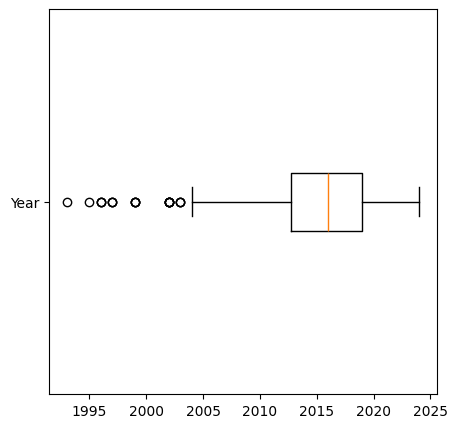

In [168]:
if setting_bag.show_books_by_year_box_plot:
    PlotManager().show_box_plot(df = books_df, x_name = "Year")


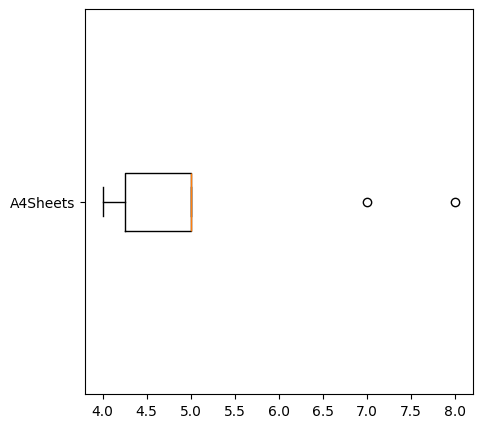

In [169]:
if setting_bag.show_reading_list_by_kbsize_box_plot:
    PlotManager().show_box_plot(df = rl_by_kbsize_df, x_name = "A4Sheets")


#### Main : Markdown Files

In [170]:
markdown_processor : MarkdownProcessor = MarkdownProcessor(component_bag = ComponentBag(), setting_bag = setting_bag)
markdown_processor.try_show_readme_md(rolling_total_df = rolling_total_df)

|   Years |   Books |   Pages | TotalSpend   | LastUpdate   |
|--------:|--------:|--------:|:-------------|:-------------|
|       9 |     304 |   83104 | $8581.65     | 2024-09-22   |



In [171]:
markdown_processor.try_show_and_save_reading_list_by_month_md(
    sas_by_month_tpl = sas_by_month_tpl, 
    sas_by_year_street_price_df = sas_by_year_street_price_df)

In [172]:
markdown_processor.try_show_and_save_reading_list_by_publisher_md(sas_by_publisher_tpl = sas_by_publisher_tpl)

In [173]:
markdown_processor.try_show_and_save_reading_list_by_rating_md(sas_by_rating_df = sas_by_rating_df)

In [174]:
markdown_processor.try_show_and_save_reading_list_by_topic_md(sas_by_topic_df = sas_by_topic_df)

In [175]:
markdown_processor.try_show_and_save_reading_list_topic_trend_md(yt_by_topic_df = yt_by_topic_df)

In [176]:
markdown_processor.try_show_and_save_reading_list_md(books_df = books_df)